# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
### YOUR CODE HERE ###
import pandas as pd

df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28
197,198,Male,32.0,126.0,74
198,199,Male,NaN,137.0,18


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [2]:
### YOUR CODE HERE ###
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [3]:

print("В поле Genre есть ошибочно заполненные значения \"Feemale\", при обработке стоит их исправить на Female")
df['Genre'].value_counts()

В поле Genre есть ошибочно заполненные значения "Feemale", при обработке стоит их исправить на Female


Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64

In [4]:
num_col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[num_col].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,200.000000
mean,39.894444,5615.433333,50.200000
std,16.842848,74531.115872,25.823522
min,18.000000,15.000000,1.000000
25%,29.000000,42.000000,34.750000
50%,36.000000,61.000000,50.000000
75%,49.000000,78.000000,73.000000
max,135.000000,1000000.000000,99.000000


In [5]:
import matplotlib.pyplot as plt

Histogram to Age


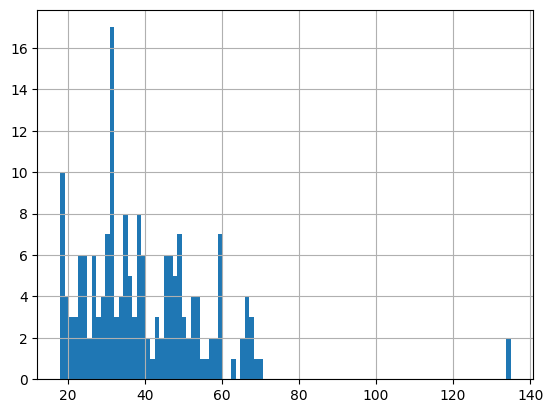

Histogram to Annual Income (k$)


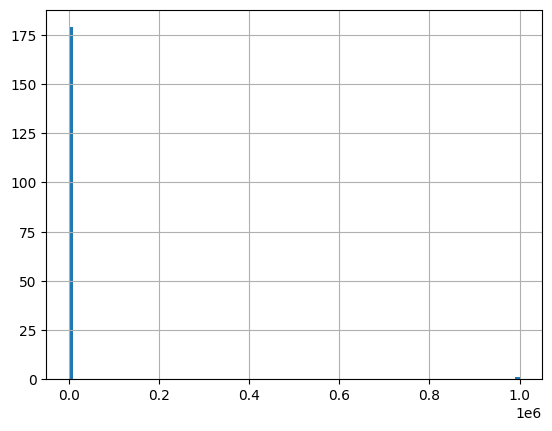

Histogram to Spending Score (1-100)


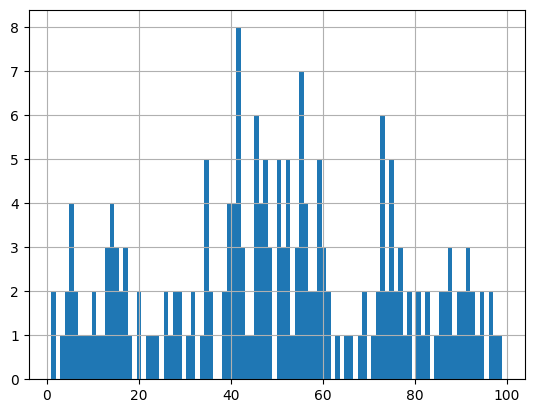

In [6]:
# df[num_col].hist(bins=50)
for col in num_col:
    print(f"Histogram to {col}")
    df[col].hist(bins=100)    
    plt.show()

In [7]:
df.loc[df['Annual Income (k$)']>100, ['Annual Income (k$)']]

,Annual Income (k$)
156,1000000.0
188,103.0
189,103.0
190,103.0
191,103.0
193,113.0
194,120.0
195,120.0
196,126.0
197,126.0


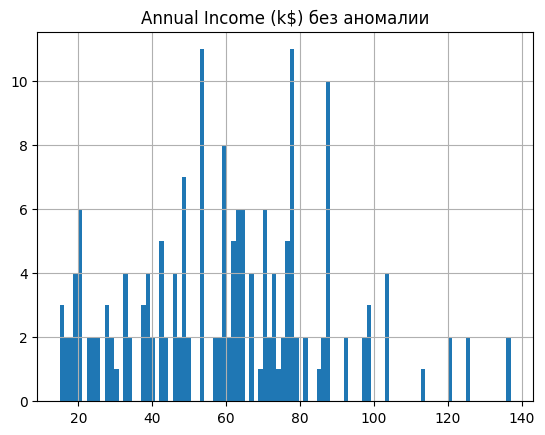

In [8]:

df.loc[df['Annual Income (k$)']<1000, ['Annual Income (k$)']].hist(bins=100)
plt.title("Annual Income (k$) без аномалии")
plt.show()

In [9]:


print(df.loc[df['Annual Income (k$)']<1000, ['Annual Income (k$)']].mean())
print(df['Annual Income (k$)'].median())
print("Тест что Медиана от исходных данных не сильно отличается от средней без учета Аномалии")

Annual Income (k$)    60.212291
dtype: float64
61.0
Тест что Медиана от исходных данных не сильно отличается от средней без учета Аномалии


In [10]:
print("в Age содержатся выбросы - невозможно завышенное значение\n"
      "Annual Income - содержит аномалию, один из покупателей миллиардер\n"
      "в Genre - содержится ошибка Feemale которую можно прировнять к Female\n"
      "в Spending Score (1-100) нормально распределенные нормализованные данные")

в Age содержатся выбросы - невозможно завышенное значение
Annual Income - содержит аномалию, один из покупателей миллиардер
в Genre - содержится ошибка Feemale которую можно прировнять к Female
в Spending Score (1-100) нормально распределенные нормализованные данные


In [11]:
# Аномалии и выбросы видны без визуализации boxplot, их мало
# for col in num_col:
#     df.boxplot(column=col)
#     plt.show()
# 

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [12]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1)
print(train.shape, test.shape)

(160, 5) (40, 5)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [13]:
### YOUR CODE HERE ###
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
print(train.info())
print("\nСтратегия заполнения пустот:\n"
      "1. Сперва удалим строки содержащие 2 пустых признака. Почему 2 - если предположить что Annual Income (k$) наша целевая переменная то у нас остаются 3 признака по которым мы должны предсказать целевую переменную.\n"
      "2. Genre - Гендр заполню наиболее распространенным\n"
      "3. Age - Заполню медианой с учтом Гендера, медиана будет менее чувствительная к выбросу\n"
      "4. Annual Income (k$) - заполню медианой значением, медиана будет менее чувствительна к аномалии которая есть в данных\n")

print("1. Записей на удаление =", train[train.isna().sum(axis=1)>= 2].shape[0])
train = train.drop(index=train[train.isna().sum(axis=1)>= 2].index)
print("записей в train после удаления:",train.shape[0])

print("2. Genre - Гендр заполню наиболее распространенным\n"
      "3. Age - Заполню медианой с учтом Гендера, медиана будет менее чувствительная к выбросу\n"
      "4. Annual Income (k$) - заполню медианой значением, медиана будет менее чувствительна к аномалии которая есть в данных\n")


# Определяем колонки с разными стратегиями
fillpop_columns = ['Genre']
fillmedian_columns = ['Age', 'Annual Income (k$)']

# Определяем стратегии для числовых и категориальных данных
fillpop_imputer = SimpleImputer(strategy='most_frequent')  
fillmedian_imputer = SimpleImputer(strategy='median')  

# Создаем один ColumnTransformer с обеими стратегиями
na_transformers = ColumnTransformer(
    transformers=[
        ('fillna_pop', fillpop_imputer, fillpop_columns),
        ('fillna_median', fillmedian_imputer, fillmedian_columns)
    ],
    remainder='passthrough'  # Остальные колонки остаются без изменений
)
na_transform_result = na_transformers.fit_transform(train)

def get_dataframe_from_colransformer(transformer_result, in_df_col_names, column_transformer):
    # Получаем колонки, которые прошли через трансформеры
    transformer_col_names = column_transformer.get_feature_names_out()
    # print("transformer_col_names****: ",transformer_col_names)
    all_col_names = []
    for tran in column_transformer.transformers_:
        if tran[0] != 'remainder':
            # print(tran[0], tran[2])
            all_col_names = all_col_names+tran[2]
        else:
            for i in tran[2]:
                # print(tran[0], in_df_col_names[i])
                all_col_names.append(in_df_col_names[i])
                
    # print("all columns!!!!!!", all_col_names)    
    
    # Преобразовываем результат в DataFrame с восстановленными именами
    result_df = pd.DataFrame(transformer_result, columns=all_col_names)
    return result_df
    
train_filled = get_dataframe_from_colransformer(na_transform_result, train.columns, na_transformers)

train_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              160 non-null    int64  
 1   Genre                   145 non-null    object 
 2   Age                     145 non-null    float64
 3   Annual Income (k$)      142 non-null    float64
 4   Spending Score (1-100)  160 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.5+ KB
None

Стратегия заполнения пустот:
1. Сперва удалим строки содержащие 2 пустых признака. Почему 2 - если предположить что Annual Income (k$) наша целевая переменная то у нас остаются 3 признака по которым мы должны предсказать целевую переменную.
2. Genre - Гендр заполню наиболее распространенным
3. Age - Заполню медианой с учтом Гендера, медиана будет менее чувствительная к выбросу
4. Annual Income (k$) - заполню медианой значением, медиана будет менее чувствите

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


Исходя из иследований всего датафрейма можно сделать вывод что выбросы есть в колонке AGE.Так как это возраст клиента он не может быть выше 100 лет, но все же не хочу делать жесткое ограничение верхней границы.попробую использовать интерквартильный размах для выявления максимальных границ в исходных данных.
Histogram to AGE


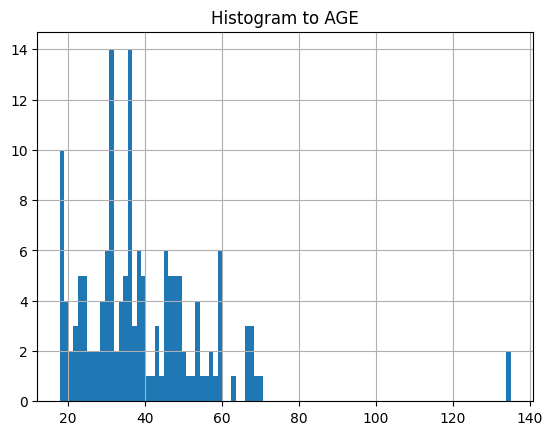

Выброс в данных с невозможным возрастом попал в тренеровачные данные
0.012903225806451613
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   155 non-null    object
 1   Age                     155 non-null    object
 2   Annual Income (k$)      155 non-null    object
 3   CustomerID              155 non-null    object
 4   Spending Score (1-100)  155 non-null    object
dtypes: object(5)
memory usage: 6.2+ KB


In [14]:
### YOUR CODE HERE ###
from sklearn.preprocessing import FunctionTransformer

print("Исходя из иследований всего датафрейма можно сделать вывод что выбросы есть в колонке AGE."
      "Так как это возраст клиента он не может быть выше 100 лет, но все же не хочу делать жесткое ограничение верхней границы."
      "попробую использовать интерквартильный размах для выявления максимальных границ в исходных данных.")

print(f"Histogram to AGE")
train_filled['Age'].hist(bins=100)
plt.title("Histogram to AGE")
plt.show()
print("Выброс в данных с невозможным возрастом попал в тренеровачные данные")

def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

boundaries = calculate_outliers(train_filled.Age)
is_outlier = (train_filled.Age < boundaries[0]) | (train_filled.Age > boundaries[1])


print(is_outlier.sum() / len(train_filled)) # процент выбросов относительно общего количества записей в датасете
train_filled[(train_filled.Age > boundaries[1])]

def outboundaries_cleaning(mydf, colname):
    boundaries = calculate_outliers(mydf[colname])
    mydf.loc[mydf[colname] < boundaries[0], [colname]] = float(boundaries[0])
    mydf.loc[mydf[colname] > boundaries[1], [colname]] = float(boundaries[1])
    return mydf

def func_df_age_cleaner(df):
    new_df = outboundaries_cleaning(df, 'Age')
    return new_df

age_cleaner = FunctionTransformer(func_df_age_cleaner)

# train_filled = outboundaries_cleaning(train_filled, 'Age')
train_filled = age_cleaner.fit_transform(train_filled)
train_filled.info()

In [15]:
# Проверим колиечство выбросов во всех колонках
num_col
for col in num_col:
    boundaries = calculate_outliers(train_filled[col])
    is_outlier = (train_filled[col] < boundaries[0]) | (train_filled[col] > boundaries[1])    
    print(is_outlier.sum(), col) # процент выбросов относительно общего количества записей в датасете

print("Хотя мы видим аномалии в данных о годовом доходе (тыс. $), полагаю что их не стоит исправлять.\nПоскольку это доход клиентов, эти данные могут быть вполне достоверными и содержать полезную информацию.")


0 Age
5 Annual Income (k$)
0 Spending Score (1-100)
Хотя мы видим аномалии в данных о годовом доходе (тыс. $), полагаю что их не стоит исправлять.
Поскольку это доход клиентов, эти данные могут быть вполне достоверными и содержать полезную информацию.


In [16]:
# Выбросы в категориальных данных
print("В Genre содержатся ошибка Feemale. Просто исправлю на Female")
print(train_filled['Genre'].value_counts())

def correct_genre(df):
    df['Genre'] = df['Genre'].str.replace('Feemale', 'Female')
    return df

genre_cleaner = FunctionTransformer(correct_genre)

train_filled = genre_cleaner.fit_transform(train_filled)
print("\n\nпосле изменений:")
print(train_filled['Genre'].value_counts())


В Genre содержатся ошибка Feemale. Просто исправлю на Female
Genre
Female     88
Male       66
Feemale     1
Name: count, dtype: int64


после изменений:
Genre
Female    89
Male      66
Name: count, dtype: int64


In [17]:
train_filled

,Genre,Age,Annual Income (k$),CustomerID,Spending Score (1-100)
0,Male,68.0,63.0,109,43
1,Male,54.0,63.0,108,46
2,Female,36.0,103.0,190,85
3,Male,37.0,20.0,15,13
4,Female,51.0,44.0,57,50
...,...,...,...,...,...
150,Female,31.0,72.0,134,71
151,Male,32.0,73.0,138,73
152,Female,60.0,50.0,73,49
153,Female,57.0,75.0,141,5


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [18]:
### YOUR CODE HERE ###
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

print("\nCustomerID - не думаю что этот признак для модели полезен, поэтому нет особого смысла переживать как этот признак повлияет на модель. Применю MinMaxScaler\n"
      "\nAge - этот признак нормально распределен и варируется в ограниченном диапазоне, думаю имеет смысл применить MinMaxScaler\n"
      "\nAnnual Income (k$) - Признак имеет аномальные значения, хочу попробовать RobustScaler судя по тому что я нашел этот метод позволяет сохранить влияние разницы в значениях но без ущерба чувствительным к выбросам моделям.\n"
      "\nSpending Score (1-100) - Нормально распределенный признак с ограниченным диапазоне от 1 до 100. К нему тоже применю MinMaxScaler")


robus_scl = RobustScaler()
minmax_scl = MinMaxScaler()

num_col_standartization = ColumnTransformer(
    transformers=[
        ('robus_std', robus_scl, ['Annual Income (k$)']),
        ('minmax_std', minmax_scl, ['Age', 'Spending Score (1-100)', 'CustomerID'])
    ],
    remainder='passthrough'  # Остальные колонки остаются без изменений
)

num_col_standartization_result = num_col_standartization.fit_transform(train_filled)
# Применяем трансформацию через fit_transform
# train_std = pd.DataFrame(num_col_standartization_result, 
#                          columns=['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'CustomerID', 'Genre'])
train_std = get_dataframe_from_colransformer(num_col_standartization_result, train_filled.columns, num_col_standartization)
train_std



CustomerID - не думаю что этот признак для модели полезен, поэтому нет особого смысла переживать как этот признак повлияет на модель. Применю MinMaxScaler

Age - этот признак нормально распределен и варируется в ограниченном диапазоне, думаю имеет смысл применить MinMaxScaler

Annual Income (k$) - Признак имеет аномальные значения, хочу попробовать RobustScaler судя по тому что я нашел этот метод позволяет сохранить влияние разницы в значениях но без ущерба чувствительным к выбросам моделям.

Spending Score (1-100) - Нормально распределенный признак с ограниченным диапазоне от 1 до 100. К нему тоже применю MinMaxScaler


,Annual Income (k$),Age,Spending Score (1-100),CustomerID,Genre
0,0.033898,0.865801,0.43299,0.542714,Male
1,0.033898,0.623377,0.463918,0.537688,Male
2,1.389831,0.311688,0.865979,0.949749,Female
3,-1.423729,0.329004,0.123711,0.070352,Male
4,-0.610169,0.571429,0.505155,0.281407,Female
...,...,...,...,...,...
150,0.338983,0.225108,0.721649,0.668342,Female
151,0.372881,0.242424,0.742268,0.688442,Male
152,-0.40678,0.727273,0.494845,0.361809,Female
153,0.440678,0.675325,0.041237,0.703518,Female


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [19]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
print("Genre - наш единственный категориальный признак принимающий 2 значения (Male, Female), OneHoteEncoder с удалением одного из двух признаков думаю идеально подойдет для обработки данного признака. Эта стратегия не создаст большое множество новых фитч чем не осложнит работу моделей и сохранит целостность данного признака.")

ohe_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
cat_col_coder = ColumnTransformer(transformers=[
    ('ohe_coding', ohe_encoder, ['Genre'])
], remainder='passthrough')
cat_col_coder_result = cat_col_coder.fit_transform(train_std)
# train_ohe_std = pd.DataFrame(cat_col_coder_result, columns=cat_col_coder.get_feature_names_out+['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'CustomerID'])
train_ohe_std = get_dataframe_from_colransformer(cat_col_coder_result, train_std.columns, cat_col_coder)
train_ohe_std = train_ohe_std.rename(columns={'Genre': 'Genre_is_Male'})
train_ohe_std

Genre - наш единственный категориальный признак принимающий 2 значения (Male, Female), OneHoteEncoder с удалением одного из двух признаков думаю идеально подойдет для обработки данного признака. Эта стратегия не создаст большое множество новых фитч чем не осложнит работу моделей и сохранит целостность данного признака.


,Genre_is_Male,Annual Income (k$),Age,Spending Score (1-100),CustomerID
0,1.0,0.033898,0.865801,0.43299,0.542714
1,1.0,0.033898,0.623377,0.463918,0.537688
2,0.0,1.389831,0.311688,0.865979,0.949749
3,1.0,-1.423729,0.329004,0.123711,0.070352
4,0.0,-0.610169,0.571429,0.505155,0.281407
...,...,...,...,...,...
150,0.0,0.338983,0.225108,0.721649,0.668342
151,1.0,0.372881,0.242424,0.742268,0.688442
152,0.0,-0.40678,0.727273,0.494845,0.361809
153,0.0,0.440678,0.675325,0.041237,0.703518


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [20]:
### YOUR CODE HERE ###
na_transform_result = na_transformers.transform(test)
test_filled = get_dataframe_from_colransformer(na_transform_result, test.columns, na_transformers)
print("\n Na filled:", test_filled.info())

test_filled = age_cleaner.transform(test_filled)
print("\n Maximum Age:", test_filled['Age'].max())

test_filled = genre_cleaner.transform(test_filled)
print("\n Genre unique:", test_filled['Genre'].value_counts())

num_col_standartization_result = num_col_standartization.transform(test_filled)
test_std = get_dataframe_from_colransformer(num_col_standartization_result, test_filled.columns, num_col_standartization)
print("\n standartization: ", test_std.head(2))

cat_col_coder_result = cat_col_coder.transform(test_std)
test_std_ohe = get_dataframe_from_colransformer(cat_col_coder_result, test_filled.columns, cat_col_coder)
test_std_ohe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   40 non-null     object
 1   Age                     40 non-null     object
 2   Annual Income (k$)      40 non-null     object
 3   CustomerID              40 non-null     object
 4   Spending Score (1-100)  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB

 Na filled: None

 Maximum Age: 67.0

 Genre unique: Genre
Female    30
Male      10
Name: count, dtype: int64

 standartization:    Annual Income (k$)       Age Spending Score (1-100) CustomerID   Genre
0          -0.542373  0.155844               0.515464   0.291457  Female
1          -0.813559  0.813853               0.350515   0.201005  Female


,Genre,Genre,Age,Annual Income (k$),CustomerID
0,0.0,-0.542373,0.155844,0.515464,0.291457
1,0.0,-0.813559,0.813853,0.350515,0.201005
2,0.0,-0.983051,0.536797,0.134021,0.170854
3,1.0,0.0,0.848485,0.597938,0.512563
4,0.0,1.254237,0.398268,0.391753,0.924623
5,1.0,2.542373,0.311688,0.175258,0.994975
6,0.0,-0.067797,0.103896,0.525773,0.477387
7,0.0,-1.525424,0.225108,0.402062,0.020101
8,0.0,-1.118644,0.08658,0.886598,0.145729
9,0.0,0.847458,0.311688,0.268041,0.844221


In [243]:
test= "rtyuirtyui"
n = 0
uniq_symb_by_index = [0]*len(test)

len_text = len(test)
print(len_text)
for i in range(len(uniq_symb_by_index)):    
    for ind, w in enumerate(test[i:]):
        n+=1
        if (w in test[i:i+ind]):            
            uniq_symb_by_index[i] = ind
            break
        elif (i+ind+1 >= len_text) & (w not in test[i:-1]):
            uniq_symb_by_index[i] = ind+1
            break
            
start_stop = (uniq_symb_by_index.index(max(uniq_symb_by_index)),
             uniq_symb_by_index.index(max(uniq_symb_by_index))+max(uniq_symb_by_index))
print(uniq_symb_by_index)
test[start_stop[0]:start_stop[1]]

# print(max(uniq_symb_by_index))

10
[5, 5, 5, 5, 5, 5, 4, 3, 2, 1]


'rtyui'

In [244]:
len([1,2])

2

In [278]:
test = [1,2]
t_target = int(len(test)/2)
for i in range(len(test)):
        
    t_target+i
    center = test[t_target]
    left_n = test[t_target-1]
    right_n = test[len(test)-1]

    if center+left_n>target:
        center == left_n
    print(left_n, center, right_n)

1 2 2
1 2 2


In [377]:
def twoSum(nums, target):    
        for i in range(len(nums)):
            # if nums[i] > target:
            #     continue
            if nums[i] >= 0 and target > 0:                
                test_target = target - nums[i] 
            elif nums[i] < 0 and target < 0:
                test_target = target + abs(nums[i])                
            else:
                if target != 0:
                    test_target = target - nums[i]                                    
                # elif target < 0:
                #     test_target = target + nums[i]
                else:
                    print(i)
                    test_target = nums[i] * -1
                

            nums[i] = None

            try:
                right = nums.index(test_target) #if target != 0 else nums.index(0)
                left = i
                return [left, right]
            except ValueError:
                continue
            
                                    

testcase = [9185270,-9977634,5152130,-7569234,2078434,3082495,6630551,-5476859,-3746865,-3892704]
target = -792364
print(twoSum(testcase, target))  

s = 'qwe'
s[-1]

closed_symb = {
            '(': ')',
            '{': '}',
            '[': ']'
        }
'{' in closed_symb

[0, 1]


True

In [378]:
7%7

0